<a href="https://colab.research.google.com/github/extrajp2014/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U git+https://github.com/matplotlib/basemap.git

In [0]:
# Packages to install
!wget https://raw.githubusercontent.com/extrajp2014/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/master/infectious-disease-cases-by-county-year-and-sex.csv
!apt install proj-bin libproj-dev libgeos-dev
# !pip install --upgrade seaborn

In [0]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
sns.__version__
import matplotlib.animation
from matplotlib import rc
from matplotlib import animation
from IPython.display import HTML

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
pd.options.display.float_format = '{:,}'.format

names=['Disease', 'County', 'Year', 'Sex', 'Count', 'Population', 'Rate', 'CI.lower', 'CI.upper', 'Unstable']
df = pd.read_csv('infectious-disease-cases-by-county-year-and-sex.csv',error_bad_lines=False)

In [7]:
# preview data
print("df shape:"), print(df.shape), print("")
print("df columns:"), print(df.columns), print("")
print("df dtypes:"), print(df.dtypes), print("")
print("df head():"), print(df.head()), print("")
print("df sample(7):"), print(df.sample(7)), print("")
print("df isnull().sum().sum():"), print(df.isnull().sum().sum()), print("")
print("df isnull().sum():"), print(df.isnull().sum()), print("")
# stats data
print("df corr():"), print(df.corr()), print("")
print("df describe(include=np.number):"), print(df.describe(include=np.number)), print("")
print("df describe(exclude=np.number):"), print(df.describe(exclude=np.number)), print("")

df shape:
(138237, 10)

df columns:
Index(['Disease', 'County', 'Year', 'Sex', 'Count', 'Population', 'Rate', 'CI.lower', 'CI.upper', 'Unstable'], dtype='object')

df dtypes:
Disease        object
County         object
Year            int64
Sex            object
Count           int64
Population      int64
Rate          float64
CI.lower      float64
CI.upper      float64
Unstable       object
dtype: object

df head():
     Disease       County  Year     Sex  Count  Population  Rate             CI.lower  CI.upper Unstable
0  Amebiasis       Solano  2005   Total      0      410570   0.0                  0.0     0.898        -
1  Amebiasis        Marin  2005    Male      4      121710 3.287                0.895     8.415        *
2  Amebiasis         Kern  2010  Female      1      404863 0.247                0.006     1.376        *
3  Amebiasis       Tulare  2001  Female      1      186935 0.535 0.013999999999999999      2.98        *
4  Amebiasis  Los Angeles  2014  Female     17     512

(None, None, None)

In [8]:
# preview values in Series
for i in ['Disease','County','Year']:
  print(df[i].value_counts())
  print("------------")

Coccidioidomycosis                                                               2655
Trichinosis                                                                      2655
Scombroid Fish Poisoning                                                         2655
Botulism, Infant                                                                 2655
Hemolytic Uremic Syndrome                                                        2655
Brucellosis                                                                      2655
Anthrax                                                                          2655
Cysticercosis or Taeniasis                                                       2655
Spotted Fever Rickettsiosis                                                      2655
Paralytic Shellfish Poisoning                                                    2655
Q Fever                                                                          2655
Typhoid Fever, case                                   

In [0]:
################################ 
# Functions to find uptrending infection rate of disease
################################

def keepFilter(keepString,colName,df):
  return df[(df[colName]==keepString)]

def removeFilter(removeString,colName,df):
  return df[(df[colName]!=removeString)]

def mainFilter(keepDict,removeDict,df):
  if len(keepDict)<1: pass
  else:
    for key in keepDict:
      df = keepFilter(key,keepDict[key],df)
  if len(removeDict)<1: pass
  else:
    for key in removeDict:
      df = removeFilter(key,removeDict[key],df)
  return df

## 1. Determine Prevalent Diseases
Pandas sort function and sns heatmap

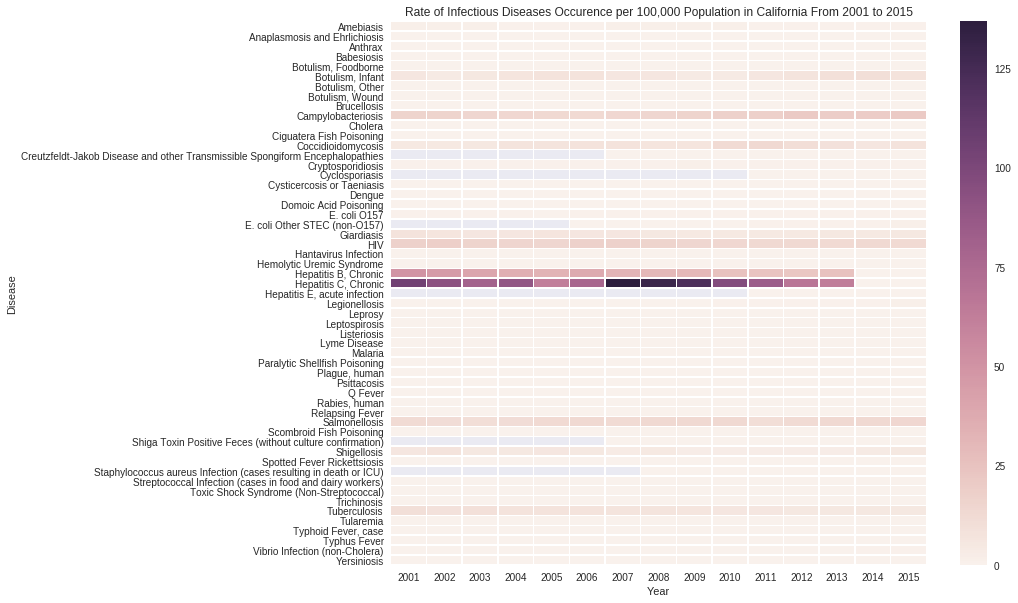

In [3]:
# 1. Overview of trending rate of infectious disease in California according to year

sns.set()
# Load data
graph_df=mainFilter({'Total':"Sex",'California':"County"}, '',df)
heat_graph = graph_df.pivot("Disease", "Year", "Rate")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(heat_graph, annot=False, fmt="d", linewidths=.5, ax=ax);
ax.set_title("Rate of Infectious Diseases Occurence per 100,000 Population in California From 2001 to 2015");
plt.show()

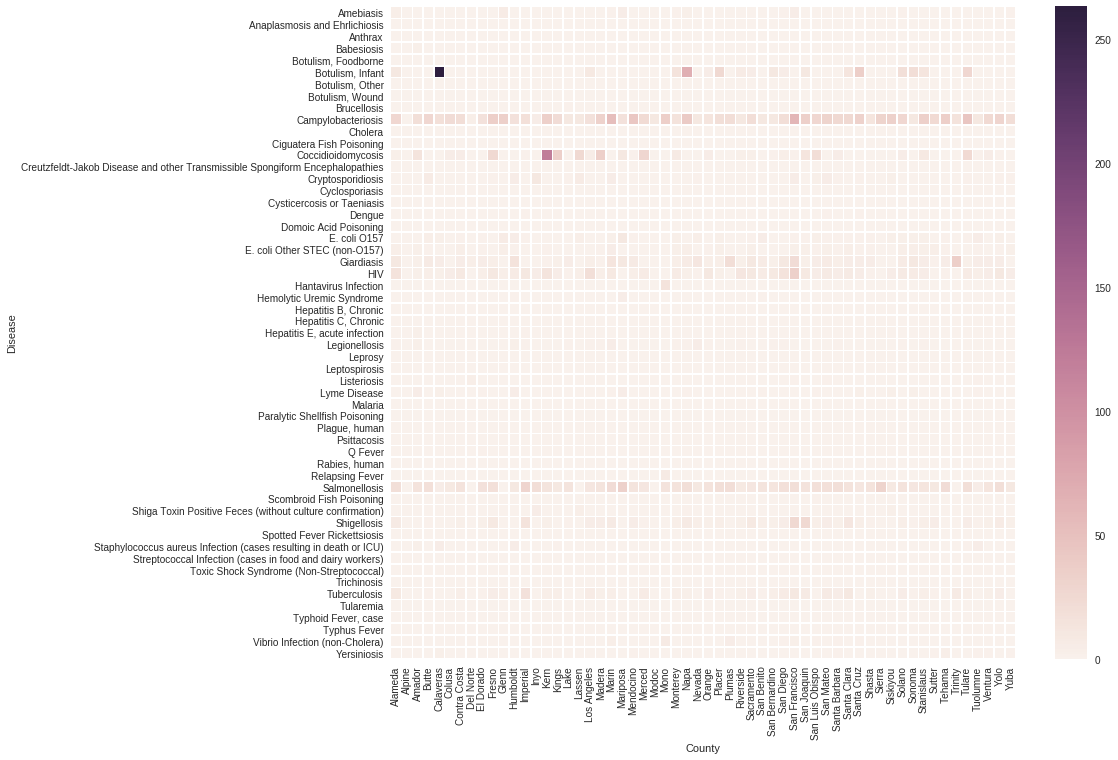

In [4]:
# Overview of 2015 report of infectious disease rate according to California counties

sns.set()
# Load data
keepDict={'Total':"Sex", 2015:"Year"}
removeDict={'California':"County"}
graph_df=mainFilter(keepDict,removeDict,df)
heat_graph = graph_df.pivot("Disease", "County", "Rate")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(heat_graph, annot=False, fmt="d", linewidths=.5, ax=ax);
plt.xticks(rotation=90)
plt.show()


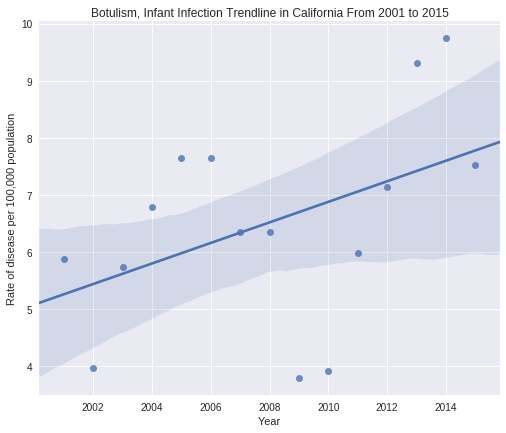

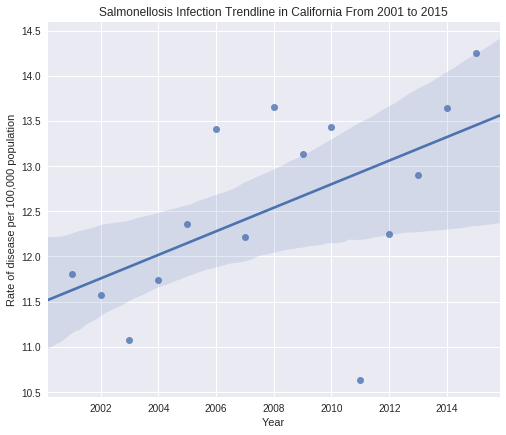

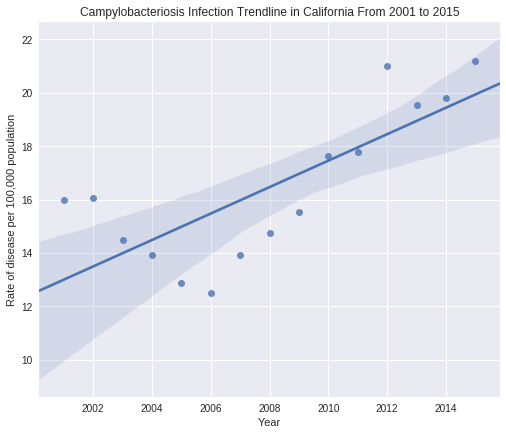

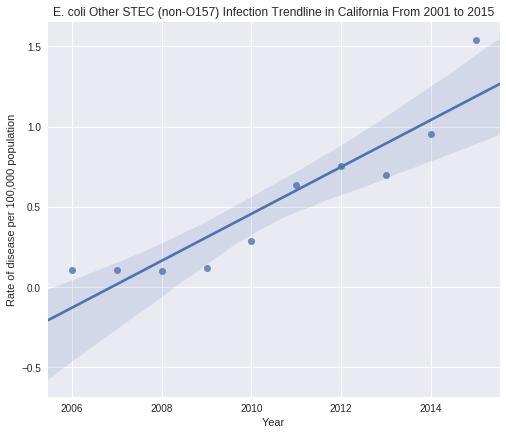

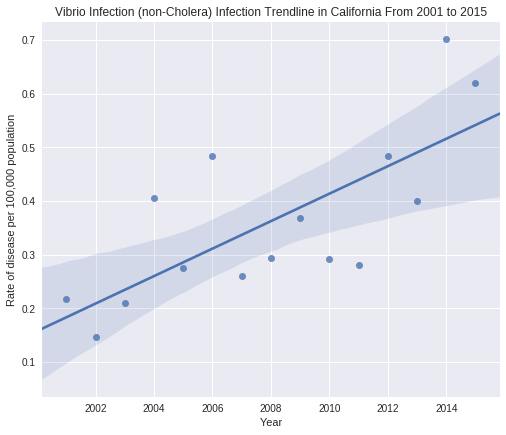

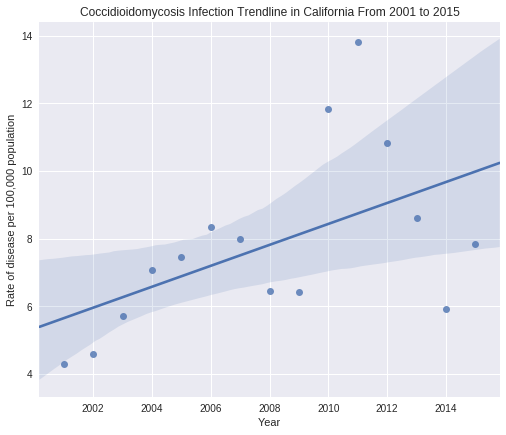

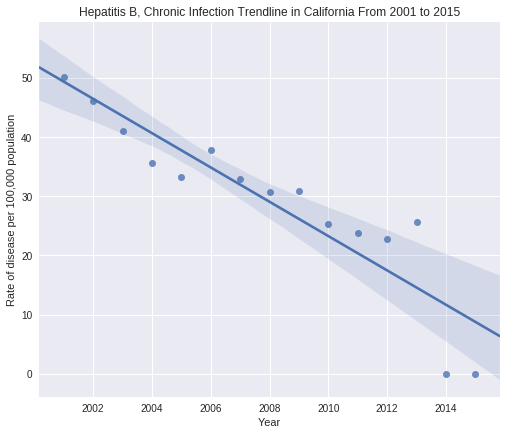

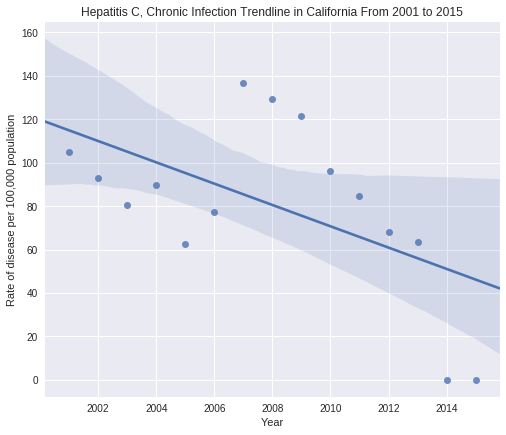

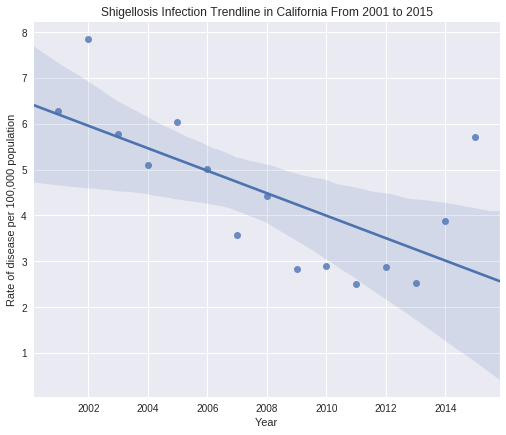

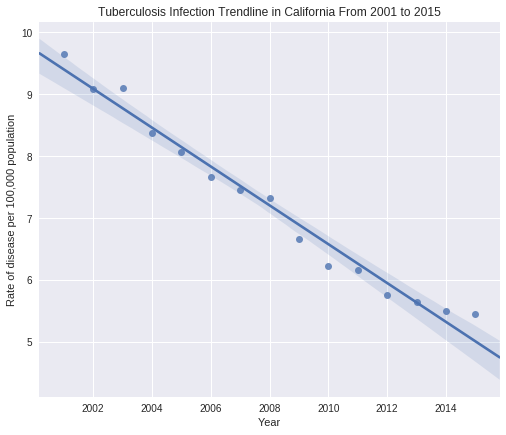

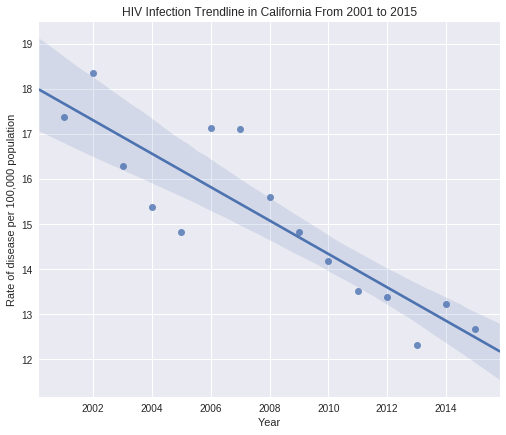

In [5]:
prevalent_disease=['Botulism, Infant','Salmonellosis', 'Campylobacteriosis',
             'E. coli Other STEC (non-O157)','Vibrio Infection (non-Cholera)',
             'Coccidioidomycosis','Hepatitis B, Chronic','Hepatitis C, Chronic', 
             'Shigellosis', 'Tuberculosis','HIV']
for i in prevalent_disease:
  graph_df=mainFilter({'Total':"Sex",i:"Disease",'California':"County"}, '',df)
  sns.lmplot(x="Year", y='Rate',palette="dark", size=6, aspect=1.2, data=graph_df);
  ax = plt.gca()
  ax.set_title(i+" Infection Trendline in California From 2001 to 2015")
  ax.set_ylabel("Rate of disease per 100,000 population")

##2.  Focus on Uptrending Diseases - Foodborn Illnesses
Lineplot and Linear Regression Plot

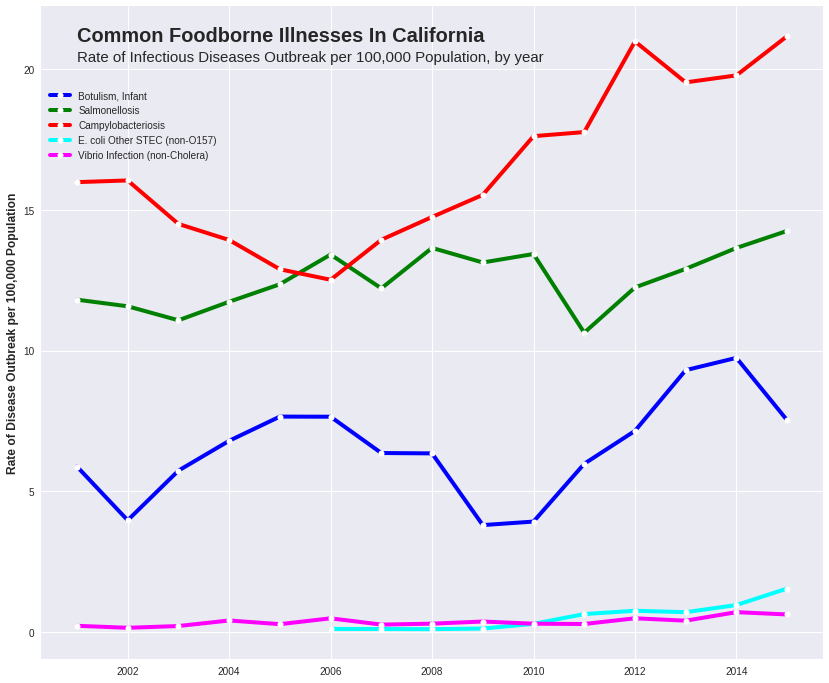

In [10]:
# Graph all uptrending rate of infection diseases in California
uptrending_Disease=['Botulism, Infant','Salmonellosis', 'Campylobacteriosis', 
                    'E. coli Other STEC (non-O157)','Vibrio Infection (non-Cholera)']
colorList=["blue","green",'red','cyan','magenta','yellow','black',"blue","green",
           'red','cyan','magenta','yellow','black',"blue","green",'red','cyan',
           'magenta','yellow','black']
markerList=['o','>','3',',']
graph_df=mainFilter({'Total':"Sex",'California':"County"}, '',df)

# multiple line plots
plt.style.use('seaborn-colorblind')
plt.figure(figsize=(14,12))
for i in range(0,len(uptrending_Disease)):
  color=colorList[i]
  if i < 7: marker=markerList[0]
  elif i >= 7 & i < 14: marker=markerList[1]
  elif i > 13 & i <= 20: marker=markerList[2]
  temp=mainFilter({'Total':"Sex",uptrending_Disease[i]:'Disease','California':"County"},
                  '',df).sort_values(by='Year', ascending=False)
  plt.plot( 'Year', 'Rate', data=temp, marker=marker, markerfacecolor='white', markersize=6, color=color, linewidth=4,
         linestyle='-', label=uptrending_Disease[i]);
ax = plt.gca()

# Add texts
ax.set_title("")
ax.set_ylabel("Rate of Disease Outbreak per 100,000 Population", fontweight='bold', fontsize=12)
ax.text(x = 2001, y = 21, s = "Common Foodborne Illnesses In California ",
       fontweight = 'bold', fontsize = 20)
ax.text(x = 2001, y = 20.3, s = "Rate of Infectious Diseases Outbreak per 100,000 Population, by year",
       fontsize = 15)
plt.legend(loc="lower left", bbox_to_anchor=(0,.75));
plt.show();

# REFERENCE: 
# https://python-graph-gallery.com/122-multiple-lines-chart/
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html


##  Mapping Campylobacteriosis Infection Rate to Counties Where It was Reported


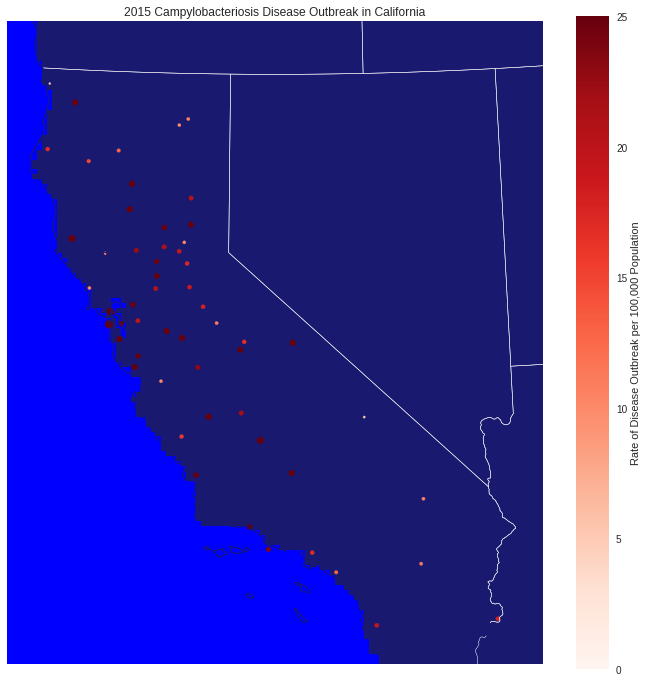

In [11]:
# REFERENCE
# https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.13-Geographic-Data-With-Basemap.ipynb#scrollTo=sLH-GLky4x8n
# Lat and Lon Data
# https://raw.githubusercontent.com/extrajp2014/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/master/zip_codes_states.csv
from mpl_toolkits.basemap import Basemap
cities = pd.read_csv('https://raw.githubusercontent.com/extrajp2014/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/master/zip_codes_states.csv')
temp=cities[cities.state=='CA'].drop_duplicates(subset=['county'])
temp.rename(columns={'county': 'County'}, inplace=True)
# Correct latitude, longitude for San Francisco County
temp['latitude'].replace({37.784827: 37.754827}, inplace = True)
temp['longitude'].replace({-122.727802: -122.527802}, inplace = True)

uptrending_Disease=['Botulism, Infant','Salmonellosis', 'Campylobacteriosis', 
                    'E. coli Other STEC (non-O157)','Vibrio Infection (non-Cholera)']
# Filter df
keepDict={'Total':"Sex", 2015:"Year",'Campylobacteriosis':"Disease"}
removeDict={'California':"County"}

# Merge geographic info with disease outbreak df
temp=pd.merge(temp[['latitude','longitude','County']], 
               mainFilter(keepDict,removeDict,df)[['Disease','County','Population','Rate']], on=['County'])

# Extract the data we're interested in
lat = temp['latitude'].values
lon = temp['longitude'].values
rate = temp['Rate'].values

# 1. Draw the map background
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='midnightblue')
m.drawcountries(color='midnightblue')
m.drawstates(color='white')
m.drawlsmask(land_color='midnightblue', ocean_color='blue')

# 2. scatter city data, with color reflecting rate
# and size reflecting rate
m.scatter(lon, lat, latlon=True,
          c=rate, s=rate, cmap='Reds', alpha=1)


# 3. create colorbar and legend
plt.colorbar(label='Rate of Disease Outbreak per 100,000 Population')
plt.clim(0, 25)

# 4. add text
ax = plt.gca()
ax.set_title("2015 Campylobacteriosis Disease Outbreak in California")
# ax.text(x = 37.754827, y = 100, s = 'San Francisco',
#        fontweight = 'bold', color = 'white' ,fontsize = 12)
plt.show();

##  Animate Campylobacteriosis Infection Rate In Infant From 2001 to 2015

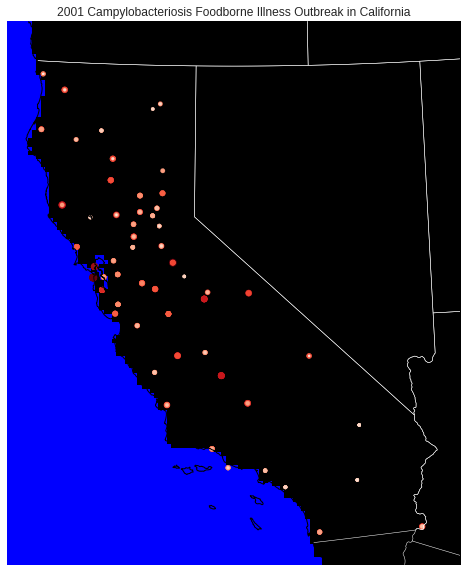

In [12]:
# 1. Draw the map background
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='black')
m.drawcountries(color='white')
m.drawstates(color='white')
m.drawlsmask(land_color='black', ocean_color='blue')

def animate(i):
  temp=cities[cities.state=='CA'].drop_duplicates(subset=['county'])
  temp.rename(columns={'county': 'County'}, inplace=True)
  # Correct latitude, longitude for San Francisco County
  temp['latitude'].replace({37.784827: 37.754827}, inplace = True)
  temp['longitude'].replace({-122.727802: -122.527802}, inplace = True)
  templist=[year for year in range(2001,2016)]
  keepDict={'Total':"Sex", templist[i]:"Year",'Campylobacteriosis':"Disease"}
  removeDict={'California':"County"}
  # Merge geographic info with disease outbreak df
  temp=pd.merge(temp[['latitude','longitude','County']], 
               mainFilter(keepDict,removeDict,df)[['Disease','County','Population','Rate']], on=['County'])
  # Extract the data we're interested in
  lat = temp['latitude'].values
  lon = temp['longitude'].values
  rate = temp['Rate'].values

  # 2. scatter city data, with color reflecting rate
  # and size reflecting rate
  m.scatter(lon, lat, latlon=True,
          c=rate, s=rate, cmap='Reds', alpha=1)

  # 3. add text
  ax = plt.gca()
  ax.set_title(str(templist[i])+" Campylobacteriosis Foodborne Illness Outbreak in California")

# To start the animation use matplotlib.animation.FuncAnimation in which you link the animation function and define how many frames your animation should contain. frames therefore defines how often animate(i) is being called.
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=15, interval=1000, repeat=True)
rc('animation', html='jshtml')
ani